In [2]:
import pandas as pd
import numpy as np

from IPython.display import display

# Klasyfikacja


```{glossary}
Klasyfikacja
    Klasyfikacja jest jednym z kluczowych zadań w uczeniu maszynowym, polegającym na przypisaniu obiektów do określonych kategorii (klas) na podstawie ich cech.
    Formalnie, klasyfikator jest funkcją $h: \mathcal{X} \rightarrow \mathcal{C}, \text{ gdzie } \mathcal{C} = \left\{c_1, c_2, \dots, c_k \right\}$, która przypisuje obiektom $x \in \mathcal{X}$ etykiety z zadanego, skończonego zbioru.
    Możemy wyróżnić dwa podstawowe typy klasyfikacji: klasyfikację binarną, gdzie mamy do czynienia z dwiema klasami, oraz klasyfikację wieloklasową, gdzie obiekt może należeć do jednej z wielu klas. W języku polskim określa się czasem zadnie klasyfikacji, mianem `taksonomii`.
    {cite:ps}`flach2012machine`, {cite:ps}`hastie2009elements`, {cite:ps}`Ma2007CS229LN`
```

## Przykłady klasyfikacji

### Klasyfikacja binarna

Jednym z klasycznych zbiorów danych, dla których pokazuje się przykłady klasyfikacji binarnej jest zbiór "Titanic", który zawiera informacje o pasażerach słynnego okrętu, w tym informacje o tym, **czy dany pasażer przeżył katastrofę czy nie**. Wolumen danych zawiera informacje demograficzne (płać, wielkość rodziny oraz jej obecność na statku), oraz związane z zajmowaną kabiną, opłatami, etc.


In [3]:
# Wczytywanie danych z pliku CSV
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Przegląd pierwszych kilku wierszy
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic_data.survived.value_counts(normalize=True).round(3)

survived
0    0.616
1    0.384
Name: proportion, dtype: float64

Widzimy, że proporcja klas wynosi około 2:1 (przeżył vs. nie przeżył), a zatem mamy do czynienia z problemem **niezbalansowanym**. Przekładając to na język formalny, możemy powiedzieć, że w przypadku zbioru danych `Titanic`:

$$\mathcal{C}_{\text{Ttianic}} = \left\{ \text{0}, \text{1} \right\}$$

gdzie 0 oznacza, że pasażer nie przeżył katastrofy, a 1, że przeżył.

### Klasyfikacja wieloklasowa

Przykładem klasyfikacji wieloklasowej, jest zbiór danych 'Iris', który zawiera informacje o trzech gatunkach irysów: `Iris-setosa`, `Iris-versicolor`, `Iris-virginica`. W tym przypadku mamy do czynienia z problemem **zbalansowanym**, ponieważ każda z klas ma tyle samo przykładów. Jest to chyba najczęściej wykorzystywany, w celach edukacyjnych, zbiór danych w uczeniu maszynowym.

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data["species"] = [iris.target_names[i] for i in iris.target]
iris_data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [6]:
iris_data.species.value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

Przekładając to na język formalny, możemy powiedzieć, że w przypadku zbioru danych `Iris`:

$$\mathcal{C}_{\text{Iris}} = \left\{ \text{Iris-setosa}, \text{Iris-versicolor}, \text{Iris-virginica} \right\}$$

## Kodowanie kategorii dla klasyfikacji i regresji

Istotne jest zwrócenie uwagi na fakt, że (wbrew temu, jak zaimplementowane są niektóre algorytmy w poszczególnych bibliotekach), modele uczenia maszynowego **nie mogą przetwarzać etykiet klas w postaci tekstowej**. W rzeczywistości, muszą one być zakodowane w postaci numerycznej, np. za pomocą kodowania `one-hot`.

Istnieje wiele sposobów do osiągnięcia tego celu. Poniżej przedstawimy tylko podstawowe sposoby. Bardziej zaawansowane metody, jak np. `embedding` zostaną omówione w dalszej części książki, razem z modelami sieci neuronowych.


### One-hot encoding.

```{glossary}
Kodowanie typu one-hot
    (ang. *one-hot encoding*) - technika kodowania zmiennych kategorycznych w postaci wektorów binarnych, w których tylko jedna zmienna jest równa 1, a pozostałe 0. W przypadku klasyfikacji wieloklasowej, każda klasa jest kodowana jako wektor binarny, w którym jedna zmienna jest równa 1, a pozostałe 0.
    Jest to jedna z najprostszych metod kodowania numerycznego dla zmiennych kategorycznych. {cite:ps}`galli2022python`
```

Definicja tej metody jest bardziej skomplikowana, niż jej działanie w praktyce. "Przepis" na `one-hot encoding` jest bardzo prosty:
```{admonition} Kodowanie one-hot
:class: tip
1. Dla każdego obiektu w zbiorze danych, przygotuj wektor o długości równej ilości klas.
2. Nadaj klasom poszczególne indeksy (np. A - 0, B - 1, C - 2, etc.).
3. Dla każdego obiektu - wstaw "1" na pozycji wektora, odpowiadającej indeksowi klasy.
```

W praktyce, wiele bibliotek wykona tą pracę za nas.

W celach edukacyjnych, przyjrzyjmy się przykładowej, własnej implementacji.

#### One-hot encoding - własna implemetacja

In [7]:
def simple_ohe(df: pd.DataFrame, target_column: str) -> np.array:

    # Pobranie unikalnych wartości z kolumny docelowej
    unique_classes = list(df[target_column].unique())

    # Przygotowanie macierzy o wymiarach liczba_wierszy x liczba_unikalnych_klas
    ohe_vectors = np.zeros((len(df), len(unique_classes)))

    # Dla każdego obiektu - ustawienie wartości 1 w odpowiednim miejscu
    indices = df[target_column].apply(lambda v: unique_classes.index(v))

    # Ustawienie wartości 1 w odpowiednich miejscach
    ohe_vectors[np.arange(len(df)), indices] = 1

    # Pomocniczo stworzymy sobie DataFrame z etykietami kategorii
    ohe_df = pd.DataFrame(ohe_vectors, columns=unique_classes)

    return ohe_df

iris_simple_ohe = simple_ohe(iris_data, "species")

display(iris_simple_ohe.head(3))

display(iris_simple_ohe.tail(3))

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0


,setosa,versicolor,virginica
147,0.0,0.0,1.0
148,0.0,0.0,1.0
149,0.0,0.0,1.0


#### One-hot encoding - użycie biblioteki 'feature-engine'

Biblioteka `feature-engine` jest jedną z wielu, które pozwalają na szybkie i łatwe kodowanie zmiennych kategorycznych. Poniżej przedstawimy przykład użycia tej biblioteki do osiągnięcia dokładnie tego samego efektu, co w przypadku własnej implementacji.

In [8]:
from feature_engine.encoding import OneHotEncoder

ohe = OneHotEncoder(variables=["species"], drop_last=False)
ohe.fit_transform(iris_data).head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0


Uzyskany efekt jest ten sam.


```{admonition} Kodowanie OHE dla danych treningowych i testowych
:class: important

Ważne jest, aby uczyć się kodować zmienne OHE na zbiorze **treningowym** i aplikować to samo kodowanie na zbiór **testowy**.

Naturalne pytanie pojawiające się w takim układzie to:

> Co, gdy w zbiorze testowym pojawi się nowa kategoria, której nie było w zbiorze treningowym?

W zależności od naszych zamiarów, modelu, oraz używanej biblioteki, można w dodać jedną, dodatkową kategorię `nieznane` / ang. *other*, która będzie obsługiwała takie przypadki. Warto zwrócić uwagę, że w przypadku niektórych modeli, takie rozwiązanie może prowadzić do problemów z interpretacją wyników.
```



```{admonition} Słabości metody OHE
:class: important

Metoda OHE jest bardzo prosta i intuicyjna, ale ma swoje wady. Jedną z nich jest to, że w przypadku zmiennych kategorycznych o dużej liczbie kategorii, może prowadzić do alokacji dużej macierzy opisujacej klasy. Nic dziwnego, skoro na potrzeby tego sposobu, tworzymy macierz o wymiarach `N x K` (gdzie K - liczba klas). Można temu zapobiegać stosujac tzw. macierze rzadkie (ang. *sparse matrices*), które są bardziej efektywne pod względem pamięciowym.

To jednak nie wszytko. Metoda OHE pomija zależności pomiedzy klasami, traktując jest wszytkie jednakowo. W przypadku, gdy zależności te są istotne, warto zastanowić się nad innymi metodami kodowania zmiennych kategorycznych, takimi jak `target encoding`, `weight of evidence`, czy `embedding`.
```

### Kodowanie numeryczne

Kodowanie numeryczne jest, w zasadzie pierwszym krokiem metody OHE. W tym przypadku, zamiast alokować macierz `N x K`, (gdzie K - liczba klas), alokujemy jednowymiarowy wektor o długości `N`, gdzie każda klasa jest zakodowana jako liczba całkowita, najczęściej jej indeks. Warto zwrócić uwagę, że w przypadku niektórych modeli, takie kodowanie może prowadzić do błędów interpretacyjnych, ponieważ model może traktować klasy jako zmienne numeryczne, a nie kategoryczne.

Bardzo często kodowanie numeryczne jest wykorzystywane przez biblioteki do optymalizacji pamięciowej metody OHE, w celu uniknięcia alokacji dużej macierzy.

## Metryki klasyfikacji binarnej

Teraz, gdy już wiemy, jak przygotować dane do modelu klasyfikacji, warto zastanowić się nad tym, jak ocenić jakość modelu. W tym celu, wykorzystuje się metryki klasyfikacji, które pozwalają na porównanie modeli pod kątem ich skuteczności.

Zaczniemy od omówienia metryk dla klasyfikacji binarnej.

### Macierz pomyłek

Podstawowym narzędziem oceny klasyfikacji jest tzw. **macierz pomyłek** (ang. *confusion matrix*), z której można wywodzić cały szereg dodatkowych metryk oceny jakości.

```{glossary}
Macierz pomyłek
    (ang. *confusion matrix*) - tabela, która pozwala na wizualizację wyników klasyfikacji binarnej. Zestawia ze sobą dwie składowe: liczność klas rzeczywistych (danych), oraz liczność predykcji modelu. W macierzy przedstawiane są cztery możliwe zależności, zachodzące między tymi składowymi:
    - **TP** (True Positive) - liczba poprawnie sklasyfikowanych obserwacji pozytywnych,
    - **TN** (True Negative) - liczba poprawnie sklasyfikowanych obserwacji negatywnych,
    - **FP** (False Positive) - liczba błędnie sklasyfikowanych obserwacji pozytywnych,
    - **FN** (False Negative) - liczba błędnie sklasyfikowanych obserwacji negatywnych.
    {cite:ps}`flach2012machine`, {cite:ps}`hastie2009elements`
```

Jeden obraz (i przykład) mówi więcej niż tysiąc słow, spójrzmy więc na poniższy przykład, wykorzystujący model zbiór danych Titanic i predykcje prostego modelu.

Wartości rzeczywiste:  [1 0 0 1 1 1 1 0 1 1]
Wartości przewidziane:  [0 1 0 1 1 1 1 0 0 1]
True Positives (TP):  54
True Negatives (TN):  83
False Positives (FP):  22
False Negatives (FN):  20


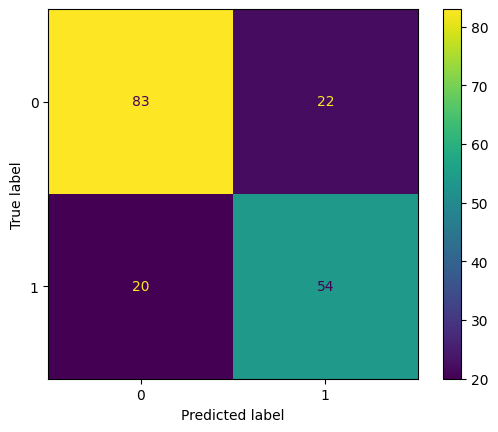

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

titanic_cols_to_take = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'adult_male']

# Wstępne przygotowanie danych - wypełnienie wart. brakujących i kodowanie OHE
num_imputer = MeanMedianImputer(imputation_method='median')
cat_imputer = CategoricalImputer(imputation_method='missing', fill_value='missing')
titanic_ohe = OneHotEncoder(variables=['sex', 'embarked', 'class', 'adult_male'], ignore_format=True)
transformation_pipe = make_pipeline(num_imputer, cat_imputer, titanic_ohe)

X = titanic_data.drop(columns=["survived"])[titanic_cols_to_take]
y = titanic_data["survived"]

# Podział danych na treningowe i testowe
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_titanic = transformation_pipe.fit_transform(X_train_titanic)
X_test_titanic = transformation_pipe.transform(X_test_titanic)

# Przygotowanie modelu
model_titanic = DecisionTreeClassifier(random_state=42)
model_titanic.fit(X_train_titanic, y_train_titanic)

# Ocena modelu
yhat_titanic = model_titanic.predict(X_test_titanic)

print("Wartości rzeczywiste: ", y_test_titanic.values[:10])
print("Wartości przewidziane: ", yhat_titanic[:10])

confmat = confusion_matrix(y_true=y_test_titanic, y_pred=yhat_titanic)

tn, fp, fn, tp = confmat.ravel()
print("True Positives (TP): ", tp)
print("True Negatives (TN): ", tn)
print("False Positives (FP): ", fp)
print("False Negatives (FN): ", fn)

ConfusionMatrixDisplay.from_predictions(y_test_titanic, yhat_titanic);

Obrazek powyżej pokazuje zestawienie predykcji i wartości oczekiwanych - wraz z ich pokrywaniem się. 

1. Suma każdego wiersza - to liczba obserwacji w danej klasie rzeczywistej.
2. Suma każdej kolumny - to liczba obserwacji w danej klasie predykcji.


### Podstawowe metryki

Jak widać powyżej, prosta macierz pomyłek daje nam szereg wartości, na podstawie których możemy wyliczać wiele metryk. Do najważniejszych należą {cite:ps}`flach2012machine`:

```{glossary}
Dokładność
    (ang. *accuracy*) - procent obserwacji, które zostały poprawnie sklasyfikowane przez model. Jest to jedna z najbardziej intuicyjnych metryk, ale może być myląca w przypadku niezbalansowanych zbiorów danych.

    $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

Precyzja
    (ang. *precision*) - procent obserwacji sklasyfikowanych jako pozytywne, które są rzeczywiście pozytywne. Jest to metryka, która pozwala na ocenę jakości modelu/testu. Odpowiada na pytanie: "jak często model ma rację, gdy przewiduje pozytywny wynik?".

    $$\text{Precision} = \frac{TP}{TP + FP}$$

Czułość
    (ang. *recall* lub *sensitivity*) - procent obserwacji pozytywnych, które zostały poprawnie sklasyfikowane przez model. JOdpowiada na pytanie: "ile prawdziwie pozytywnych przypadków udało się wykryć".

    $$\text{Recall} = \frac{TP}{TP + FN}$$

Specyficzność
    (ang. *specificity*) - procent obserwacji negatywnych, które zostały poprawnie sklasyfikowane przez model. Odpowiada na pytanie: "ile prawdziwie negatywnych przypadków udało się wykryć".
    
    $$\text{Specificity} = \frac{TN}{TN + FP}$$
```

```{admonition} Warto znać metryki
:class: tip
Wśród niewielu rzeczy, których warto się uczyć na pamięć i znać na wylot, są podstawowe metryki klasyfikacji wywiedzione z macierzy pomyłek. Naprawdę warto jest pamiętać - przydaje się to niemal w każdej dyskusji i analizie dowolnego modelu klasyfikacji.
```

Zobaczmy, jak wyglądają wartości opisanych metryk, w przypadku modelu klasyfikacji binarnej dla danych Titanic.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test_titanic, yhat_titanic)
precision = precision_score(y_test_titanic, yhat_titanic)
recall = recall_score(y_test_titanic, yhat_titanic)

specificity = tn / (tn + fp)

print(f"{'Dokładność / Accuracy':<30}: {accuracy:.3f}")
print(f"{'Precyzja / Precision':<30}: {precision:.3f}")
print(f"{'Czułość / Recall':<30}: {recall:.3f}")
print(f"{'Specyficzność / Specificity':<30}: {specificity:.3f}")

Dokładność / Accuracy         : 0.765
Precyzja / Precision          : 0.711
Czułość / Recall              : 0.730
Specyficzność / Specificity   : 0.790


Zachęcam, dla utrwalenia, do policzenia "ręcznie" tych wartości i upewnienia się, czy zgadzają się z wynikami poniżej :) 

### F1-score

Jak podkreślaliśmy wcześniej, metryka dokładności / *accuracy* nie jest najlepszym wyborem w przypadku, gdy zbiór danych nie jest zbalansowany. W takich przypadkach, warto zwrócić uwagę na metrykę F1-score, która jest średnią harmoniczną precyzji i czułości.


```{glossary}
Miara F1 (ang. F1-score)
    Miara F1 jest średnią harmoniczną precyzji i czułości. Jest to metryka jakości klasyfikacji binarnej, szczególnie przydatna w przypadku niezbalansowanych zbiorów danych. Przyjmuje wartości z zakresu [0, 1], gdzie 1 oznacza idealną klasyfikację, a 0 - całkowity brak trafności.
    Ze względu na swoje właściwości, jej wartości oscylują pomiędzy precyzją i czułością, zbiegając ku wartości mniejszej z nich. Dzięki temu Miara F1 pozwala wychwycić sytuacje niedoszacowania/przeszacowania kluczowych metryk. 
    Formalnie miarę F1 wyliczamy następująco:

    $$\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

    {cite:ps}`flach2012machine`, {cite:ps}`sammut2017encyclopedia`
```

Rozpatrzmy następujący przykład, oparty na wydarzeniach, zwiazanych z pandemią COVID-19.

```{admonition} Przykład skrajnej nierównowagi klas - różnice w metrykach
Na początku pandemii COVID-19 trwał wyścig, mający na celu opracowanie jak najdokładniejszych testów, pozwalających na szybkie wykrycie zakażenia. Firmy farmaceutyczne i laboratoria badawcze zaczęły opracowywać testy, które miały jak najmniejsze ryzyko błędu. W przypadku testów na obecność wirusa, ważne jest, aby test był jak najbardziej czuły (wysoki, ang. *recall*), aby nie przegapić przypadków zakażenia. Zdarzały się również sytuacje, gdy testy nie wykrywały niczego, stając się bezużyteczne.

* Wyobraźmy sobie, że do punktu kontrolnego dostarczono **bardzo słaby test** - test, tylko w połowie przypadków wykrył wirusa.
* W kolejce do testowania czeka 100 pacjentów, z czego:
    - 90 jest zdrowych,
    - 10 jest chorych na nową odmianę wirusa.

Fragment kodu poniżej pokazuje wartości poszczególnych metryk dla tego testu.
```

In [12]:
from sklearn.metrics import f1_score, classification_report

# Kolejka 100 pacjentów: 90x"0" (zdrowy), 10 x "1" (chory)
patients = np.array([0] * 90  + [1] * 10)

# Wadliwy test, wykrył tylko połowę przypadków zakażenia
test_result = np.array([0] * 95 + [1] * 5)

# Wyliczenie metryk
accuracy = accuracy_score(patients, test_result)
precision = precision_score(patients, test_result)
recall = recall_score(patients, test_result)
f1 = f1_score(patients, test_result)

print(f"{'Dokładność / Accuracy':<30}: {accuracy:.3f}")
print(f"{'Precyzja / Precision':<30}: {precision:.3f}")
print(f"{'Czułość / Recall':<30}: {recall:.3f}")
print(f"{'F1':<30}: {f1:.3f}")

# Podsumowanie wszystkich metryk jednocześnie - bardzo przydatna funkcja
print("\n\n")
print(classification_report(patients, test_result))

Dokładność / Accuracy         : 0.950
Precyzja / Precision          : 1.000
Czułość / Recall              : 0.500
F1                            : 0.667



              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.50      0.67        10

    accuracy                           0.95       100
   macro avg       0.97      0.75      0.82       100
weighted avg       0.95      0.95      0.94       100



Te wyniki nie napawają optymizmem, co więcej, **osoby nieznające się na ich interpretacji** mogłyby mylnie uznać, że wyniki są dobre.

1. **Dokładność** - 90% - wydaje się być bardzo wysoka, podobnie jak...
2. **Precyzja** - 100% - wszystkie przypadki, które test uznał za pozytywne, były rzeczywiście pozytywne. Dobrze, prada? Ale...
3. **Czułość** - 50% - tylko połowa przypadków pozytywnych została wykryta. To już nie wygląda tak dobrze.
4. **Miara F1** - 66.67% - średnia harmoniczna precyzji i czułości. Wciąż nie jest to wynik, który można uznać za zadowalający.

Dlatego tak ważne jest rozpatrywanie wielu metryk jednocześnie, a nie tylko kierowanie się pojedynczą wartością.

```{admonition} Wybór pojedynczej metryki
:class: tip
Czasem zdarza się, że trzeba wybrać pojedynczą wartość. Dzieje się tak np. przy optymalizacji modelu metodami automatycznymi, gdy wskazujemy **funkcję celu** wzgledem której optymalizator ma poprawiać wyniki. W takiej sytuacji, zwykle można wybrać miarę F1, która jest kompromisem pomiędzy precyzją i czułością.
```

## Metryki klasfikacji wieloklasowej

Klasyfikacja wieloklasowa to zadanie, w którym obiekty mogą być przypisane do jednej z wielu klas. W takim przypadku, metryki klasyfikacji binarnej nie są wystarczające, ponieważ nie uwzględniają wszystkich klas.Na całe szczęście, jak słusznie zwracają na to uwagę niektórzy autorzy {cite:ps}`flach2012machine`, {cite:ps}`mohri2012foundations`, każdy problem klasyfikacji wieloklasowej da się sprowadzić do serii problemów klasyfikacji binarnej.

W poniższym omówieniu wykorzystamy zbiór danych `Iris`, przedstawiony już wcześniej, jako klasyczny przykład tego zadania.

In [14]:
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [15]:
from feature_engine.encoding import OrdinalEncoder

# Kodowanie numeryczne klas - tym razem nie używamy OHE
ordinal_encoder = OrdinalEncoder(encoding_method='arbitrary', variables=['species'])
iris_encoded  = ordinal_encoder.fit_transform(iris_data)



# Podział na dane treningowe i testowe
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris_encoded.drop(columns=["species"]),
                                                    iris_encoded["species"],
                                                    test_size=0.2,
                                                    random_state=42)


X_train_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4


In [16]:
# Jak zostały zakodowane nasze klasy?
ordinal_encoder.encoder_dict_

{'species': {'setosa': 0, 'versicolor': 1, 'virginica': 2}}

### Macierz pomyłek dla klasyfikacji wieloklasowej

W przypadku klasyfikacji wieloklasowej macierz pomyłek jest rozszerzeniem macierzy pomyłek dla klasyfikacji binarnej. W przypadku klasyfikacji wieloklasowej, macierz pomyłek jest macierzą kwadratową, w której wiersze odpowiadają klasom rzeczywistym, a kolumny klasom predykcji, tak samo, jak wcześniej.

Przykład poniżej:

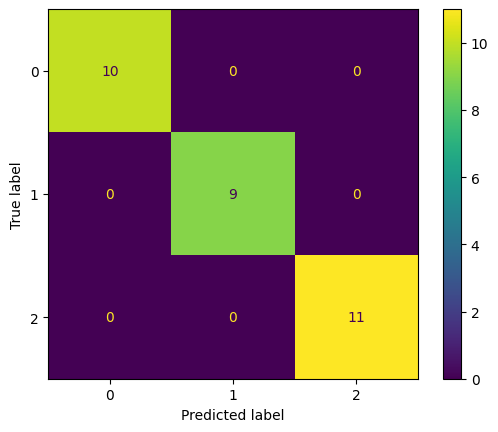

In [17]:
decision_tree_iris = DecisionTreeClassifier(random_state=42)
decision_tree_iris.fit(X_train_iris, y_train_iris)

yhat_iris = decision_tree_iris.predict(X_test_iris)

ConfusionMatrixDisplay.from_predictions(y_test_iris, yhat_iris);

### Precyzja, czułość i miara F1 dla klasyfikacji wieloklasowej


W klasyfikacji wieloklasowej, gdy model generuje predykcje dla wielu klas, potrzebujemy sposobu, by ocenić jego ogólną skuteczność na podstawie metryk takich jak precyzja, czułość, czy miara F1. Zazwyczaj używa się trzech głównych podejść do agregacji tych metryk: **micro-average**, **macro-average** oraz **weighted-average**. Każde z nich różni się sposobem obliczania średniej, co może prowadzić do różnych interpretacji wyników.

#### 1. **Micro-average**

**Micro-average** to metoda obliczania średnich metryk (np. precyzji, czułości, F1), która traktuje każdą obserwację równo, bez względu na przynależność do klasy. W podejściu *micro-average*, wszystkie prawdziwe pozytywne, fałszywe pozytywne i fałszywe negatywne są sumowane przez wszystkie klasy, a następnie na tej podstawie obliczana jest metryka.

$$
\begin{align}
\text{Precision}_{micro} &= \frac{\sum_{i=1}^{K} TP_i}{\sum_{i=1}^{K} (TP_i + FP_i)} \\[1em]
\text{Recall}_{micro} &= \frac{\sum_{i=1}^{K} TP_i}{\sum_{i=1}^{K} (TP_i + FN_i)} \\[1em]
\text{F1-score}_{micro} &= \frac{2 \times \text{Precision}_{micro} \times \text{Recall}_{micro}}{\text{Precision}_{micro} + \text{Recall}_{micro}}
\end{align}
$$

**Przykład:**

Załóżmy, że mamy trzy klasy (A, B, C) i następujące dane:

- TP (True Positives): A = 40, B = 30, C = 50
- FP (False Positives): A = 10, B = 15, C = 5
- FN (False Negatives): A = 20, B = 25, C = 10

Wówczas:

$$
\begin{align}
\text{Precision}_{micro} &= \frac{40 + 30 + 50}{(40 + 30 + 50) + (10 + 15 + 5)} = \frac{120}{150} = 0.80 \\[1em]
\text{Recall}_{micro} &= \frac{40 + 30 + 50}{(40 + 30 + 50) + (20 + 25 + 10)} = \frac{120}{175} = 0.686 \\[1em]
\text{F1-score}_{micro} &= \frac{2 \times 0.80 \times 0.686}{0.80 + 0.686} = 0.737
\end{align}
$$



#### 2. **Macro-average**

**Macro-average** oblicza metryki dla każdej klasy indywidualnie, a następnie średnia arytmetyczna tych metryk jest brana jako ostateczny wynik. W przeciwieństwie do micro-average, macro-average nie bierze pod uwagę rozkładu klas, co oznacza, że rzadkie klasy mają taki sam wpływ na końcową metrykę, jak klasy bardziej licznie reprezentowane.

$$
\begin{align}
\text{Precision}_{macro} &= \frac{1}{K} \sum_{i=1}^{K} \text{Precision}_i \\
\text{Recall}_{macro} &= \frac{1}{K} \sum_{i=1}^{K} \text{Recall}_i \\
\text{F1-score}_{macro} &= \frac{1}{K} \sum_{i=1}^{K} \text{F1-score}_i
\end{align}
$$


**Przykład:**

Używając tych samych danych co wcześniej:

$$
\begin{align}
\text{Precision}_A &= \frac{40}{40 + 10} = 0.80 \\
\text{Precision}_B &= \frac{30}{30 + 15} = 0.667 \\
\text{Precision}_C &= \frac{50}{50 + 5} = 0.909 \\
\text{Precision}_{macro} &= \frac{0.80 + 0.667 + 0.909}{3} = 0.792
\end{align}
$$


Podobnie obliczamy recall i F1-score dla każdej klasy, a następnie ich średnią.



#### 3. **Weighted-average**

**Weighted-average** (średnia ważona) to metoda, która podobnie jak macro-average, oblicza metryki dla każdej klasy indywidualnie, ale uwzględnia przy tym rozkład klas. Każda metryka dla danej klasy jest ważona liczbą przykładów w tej klasie.

$$
\begin{align}
\text{Precision}_{weighted} &= \frac{1}{N} \sum_{i=1}^{K} n_i \times \text{Precision}_i \\
\text{Recall}_{weighted} &= \frac{1}{N} \sum_{i=1}^{K} n_i \times \text{Recall}_i \\
\text{F1-score}_{weighted} &= \frac{1}{N} \sum_{i=1}^{K} n_i \times \text{F1-score}_i
\end{align}
$$

gdzie $n_i$ to liczba próbek w klasie $i$, a $N$ to całkowita liczba próbek we wszystkich klasach.

**Przykład:**

Załóżmy, że liczby próbek w klasach są następujące:

- Liczba próbek: A = 70, B = 70, C = 65

Wówczas, weighted-average precision będzie obliczona jako:

$$
\text{Precision}_{weighted} = \frac{70 \times 0.80 + 70 \times 0.667 + 65 \times 0.909}{70 + 70 + 65} = \frac{161.775}{205} = 0.78
$$

### Podsumowanie

Jak widać w przykładach powyżej - nawet dla tych smaych metryk (precyzji/czułośći/F1) - wyniki mogą się różnic, w zależności od uśrednienia. Ostateczny wybór zależy od konkretnej sytacji i tego, jak model ma być oceniany.

```{admonition} Sugerowane metody wyboru uśrednienia
:class: tip
- **Micro-average** jest odpowiednie, gdy zależy nam na ocenie ogólnej skuteczności modelu niezależnie od rozkładu klas.
- **Macro-average** jest przydatne, gdy interesuje nas równomierna ocena skuteczności modelu dla każdej klasy, bez względu na liczebność klas.
- **Weighted-average** zapewnia bardziej zbalansowaną ocenę, uwzględniając zarówno skuteczność dla każdej klasy, jak i ich liczebność, co jest szczególnie użyteczne w przypadkach, gdy rozkład klas jest nierównomierny.
```